In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/DL_Project
!git pull

/content/drive/My Drive/DL_Project
Already up to date.


In [0]:
# !mkdir data
# %cd data
# !gsutil -m cp gs://quickdraw_dataset/full/numpy_bitmap/*.npy .
# %cd ..

In [1]:
import numpy as np
import torch
import os
from torch.utils.data import Dataset, DataLoader

from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
class SketchDataSet(Dataset):
    """ Sketch datset """
    def __init__(self, directory, is_train):
        # Is this testing or training data?
        if is_train:
            self.is_train = True
        else:
            self.is_train = False
    
        self.num_class = 0 
        self.num_images = 0
        self.fnames = [None]*18
        self.fsize = [None]*18
        self.fimgsize = [None]*18
        
        i = 0
        for filename in os.listdir(directory):
            if filename.endswith(".npy"): 
                self.num_class += 1
                data = np.load(directory + filename)
                self.fnames[i] = directory + filename
                if is_train:
                    self.num_images += int(len(data)*0.8)
                    self.fsize[i] = int(len(data)*0.8)
                    self.fimgsize[i] = self.num_images
                else:
                    self.num_images += int(len(data)*0.2)
                    self.fsize[i] = int(len(data)*0.2)
                    self.fimgsize[i] = self.num_images
                i += 1
            
    def size_of_class(self, ind):
        return self.fsize[ind]
    
    def num_of_classes(self):
        return self.num_class

    def __len__(self):
        return self.num_images

    def __getitem__(self, ind):
        if self.is_train:
            for i in range(0, self.num_class):
                if ind - self.fimgsize[i] < 0 and i == 0:
                    img_dat = np.load(self.fnames[0])[ind].reshape(28, 28)
                    return torch.from_numpy(img_dat), i
                elif ind - self.fimgsize[i] < 0:
                    img_dat = np.load(self.fnames[i])[ind - self.fimgsize[i-1]].reshape(28, 28)
                    return torch.from_numpy(img_dat), i
        else:
            for i in range(0, self.num_class):
                if ind - self.fimgsize[i] < 0 and i == 0:
                    np_dat = np.load(self.fnames[0])
                    ind_offset = int(len(np_dat)*0.8)

                    img_dat = np_dat[ind + ind_offset].reshape(28, 28)
                    return torch.from_numpy(img_dat), i
                elif ind - self.fimgsize[i] < 0:
                    np_dat = np.load(self.fnames[0])
                    ind_offset = int(len(np_dat)*0.8)

                    img_dat = np_dat[ind + ind_offset - self.fimgsize[i-1]].reshape(28, 28)
                    return torch.from_numpy(img_dat), i
        return None, None

In [20]:
dataset = SketchDataSet("./data/", is_train=True)

In [21]:
print(len(dataset))
print(dataset.size_of_class(0))

2147438
93203


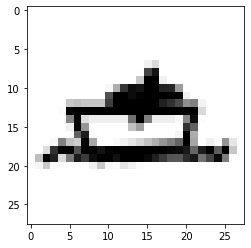

Label 0


In [23]:
data, label = dataset[93202]
plt.imshow(data, cmap='Greys')
plt.show()
print("Label {}".format(label))

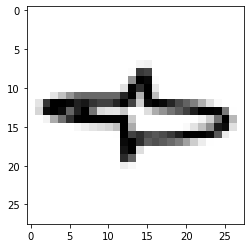

Label 0


In [24]:
data, label = dataset[13]
plt.imshow(data, cmap='Greys')
plt.show()
print("Label {}".format(label))

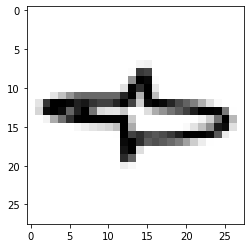

In [25]:
dat = np.load('./data/aircraft carrier.npy')
plt.imshow(dat[13].reshape(28,28), cmap='Greys')
plt.show()